


Vector AutoRegression:

Multiple equation model for joint determination of two or more variables

• One of the most commonly used models for applied macroeconometric analysis and forecasting in central banks

### Sims and VARs

• Sims argued that the conventional models were restricted VARs, and the restrictions had no substantive justification – Based on incomplete and/or non‐rigorous theory, or intuition

• Sims argued that economists should instead use unrestricted models, e.g. VARs

• He proposed a set of tools for use and evaluation of VARs in practice.

http://www.ssc.wisc.edu/~bhansen/390/

In [2]:
!python -V

Python 2.7.13 :: Anaconda 4.3.0 (64-bit)


In [3]:
!conda info --envs

# conda environments:
#
py34                     d:\Anaconda2\envs\py34
root                  *  d:\Anaconda2



In [5]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import ipystata

In [11]:
%%stata
clear all

In [6]:
%%stata

capture cd "G:\project2\Economics_note\macroeconomics\VAR"

capture log close
log using US_GDP, text replace

insheet using US_GDP_49_09.csv, names case clear




In [7]:
%%stata
* Preliminaries

gen t = _n
tsset t
gen ly=ln(GDP)
label var ly "Log(GDP)"
gen tsq=t^2


In [8]:
%%stata
********** Task 1 ************
* Stata time-series operators

list YEAR  t  GDP  L.GDP  L2.GDP  L3.GDP
list YEAR  t  GDP  L.GDP  F.GDP
list YEAR  t  GDP  L.GDP  L2.GDP  L3.GDP
list YEAR  t  GDP  F.GDP  F2.GDP  F3.GDP
list YEAR  t  GDP  F.L.GDP
list YEAR  t  GDP  D.GDP

gen diff1 = GDP - L.GDP
list YEAR  t  GDP  D.GDP diff1

gen diff2 = GDP - L2.GDP
gen doublediff = diff1 - L.diff1
list YEAR  t  GDP  D.GDP  D2.GDP  diff2  doublediff

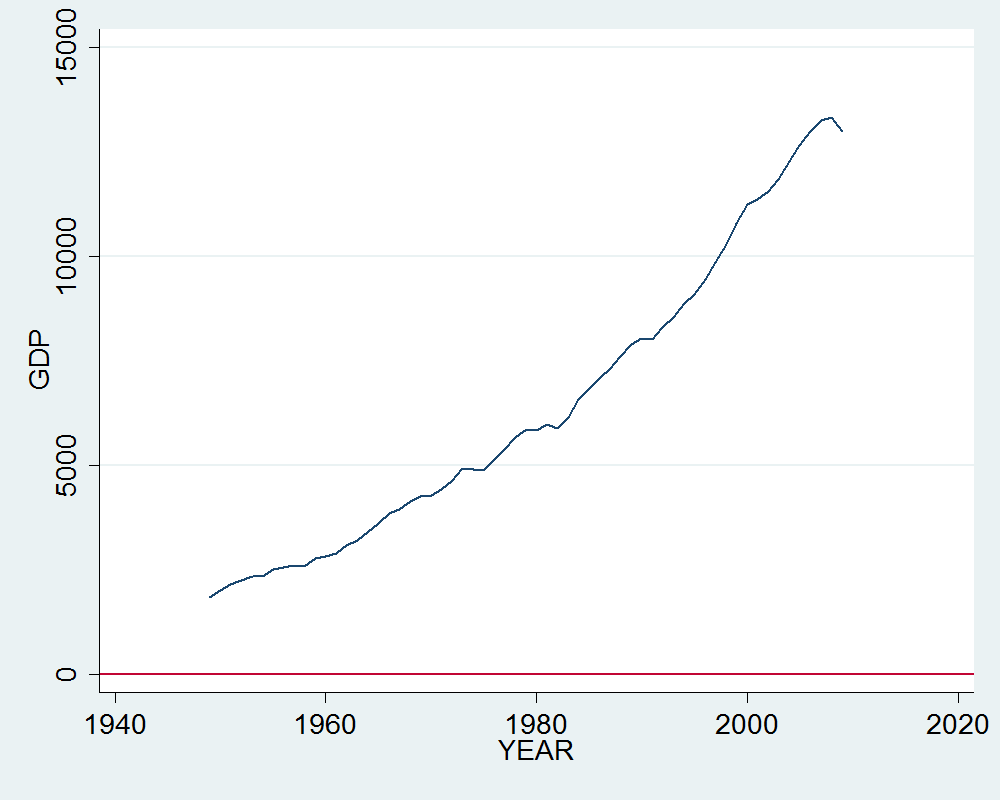

In [9]:
%%stata --graph
********** Task 2 ************
* Inspecting the data

* slide 147

line GDP YEAR, yline(0)

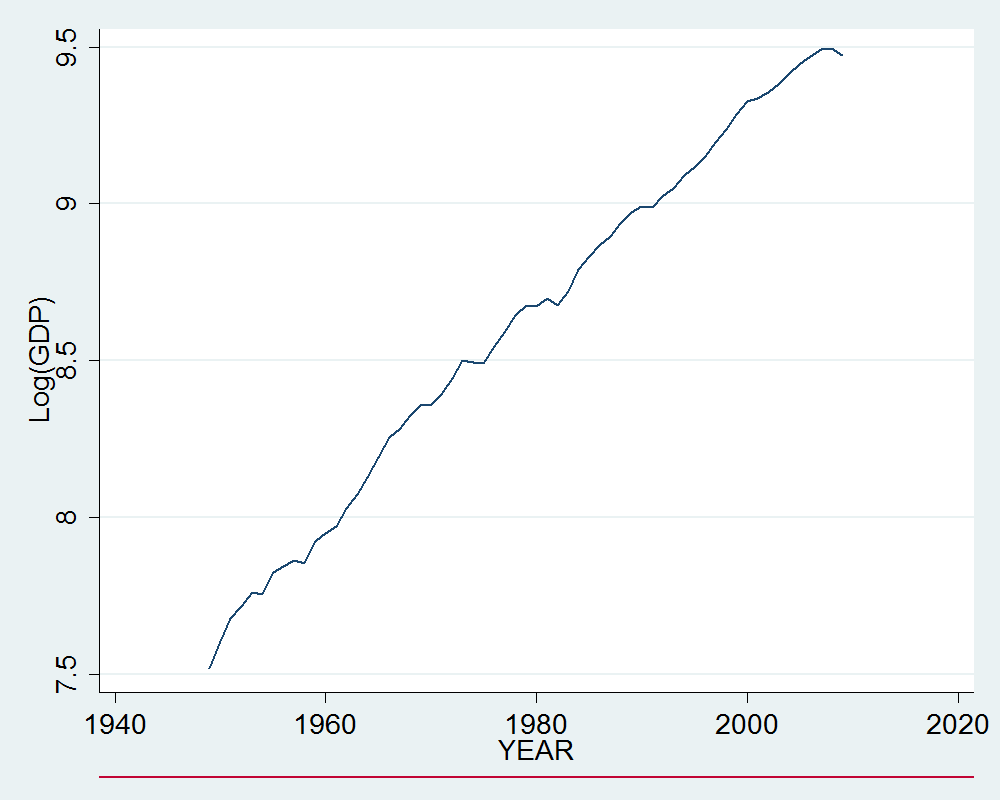

In [9]:
%%stata --graph
line ly YEAR, yline(0)

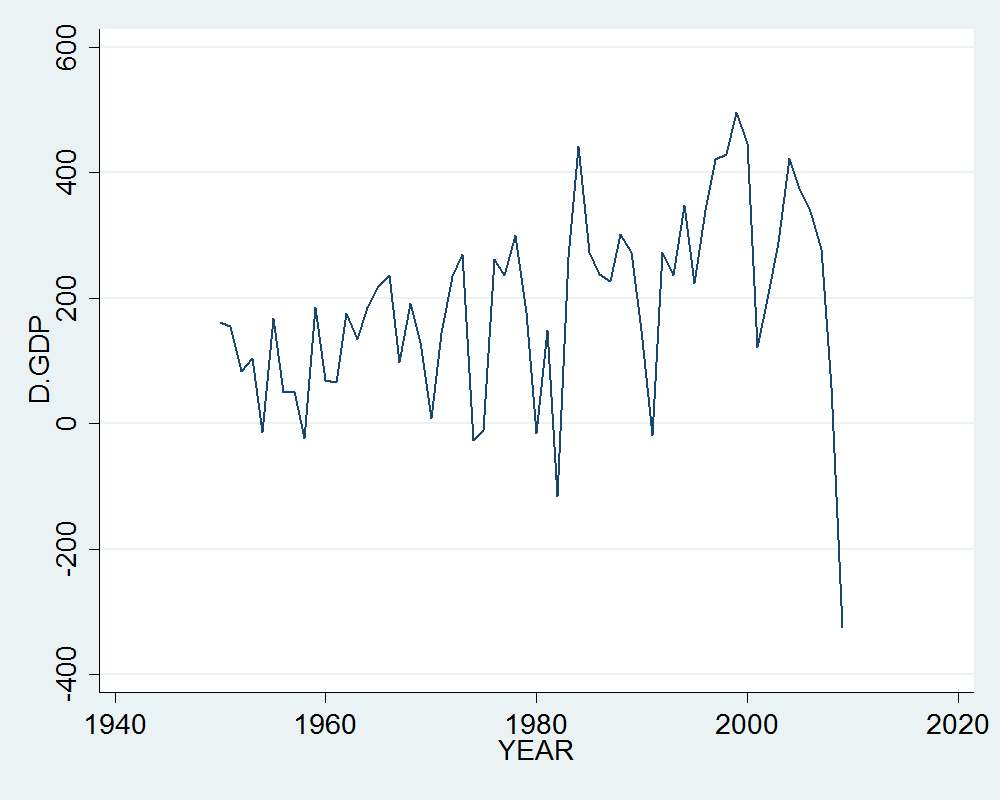

In [10]:
%%stata --graph
line D.GDP YEAR

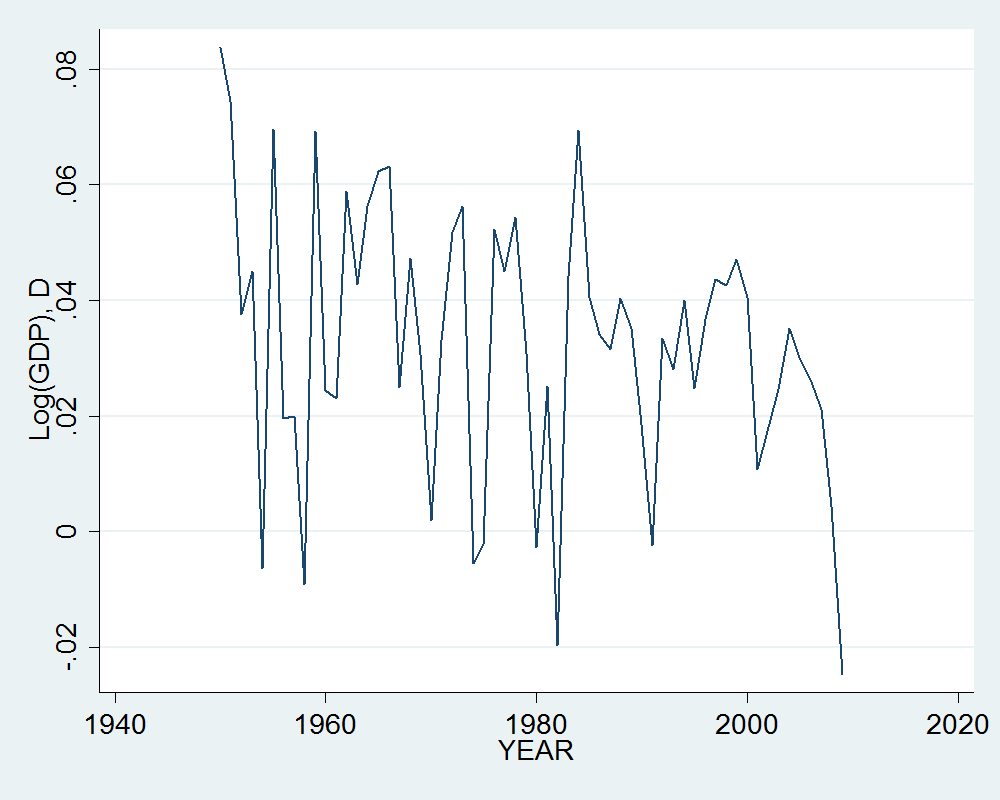

In [11]:
%%stata --graph
* slide 148


line D.ly YEAR

In [12]:
%%stata 

********** Task 3 ************
* Modelling log GDP

* slide 149

reg D.ly t

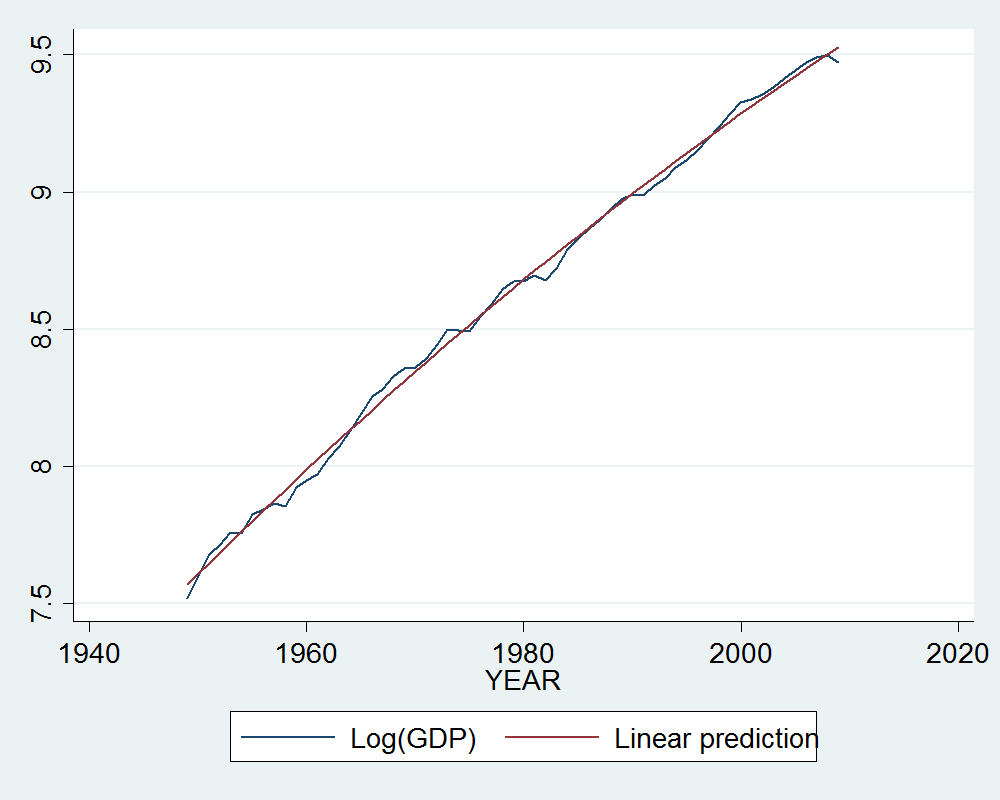

In [13]:
%%stata --graph



* slide 150

reg ly t tsq 
predict lyhat, xb
line ly lyhat YEAR 


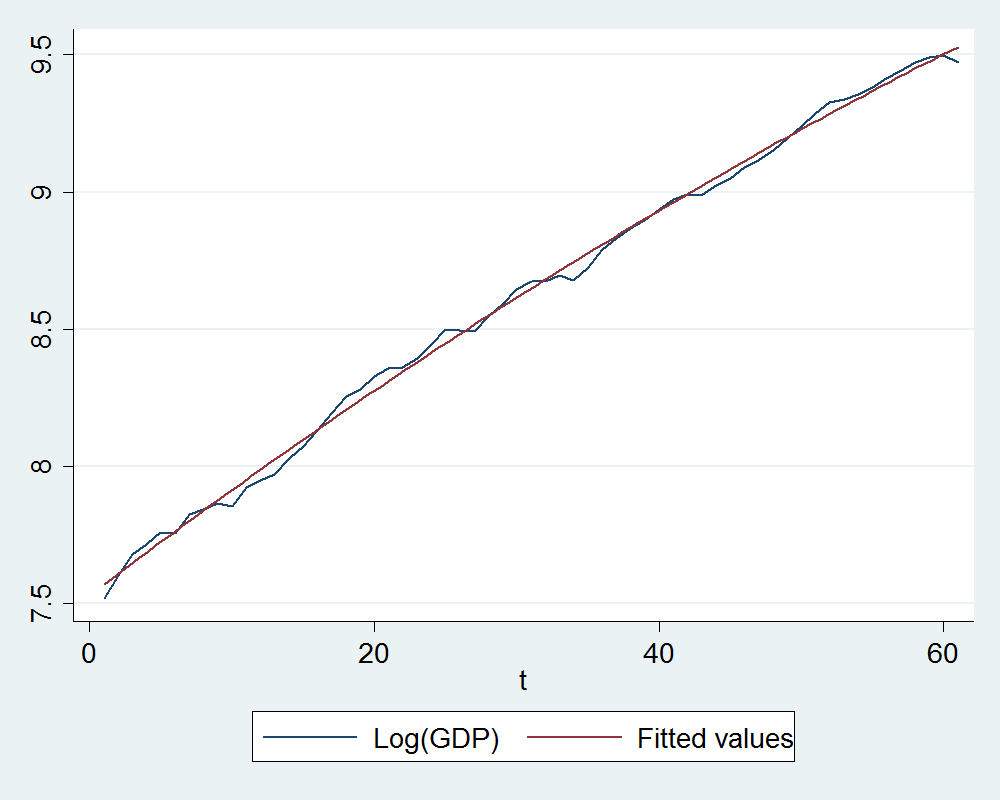

In [15]:
%%stata --graph

twoway  (line ly t)(qfit ly t)

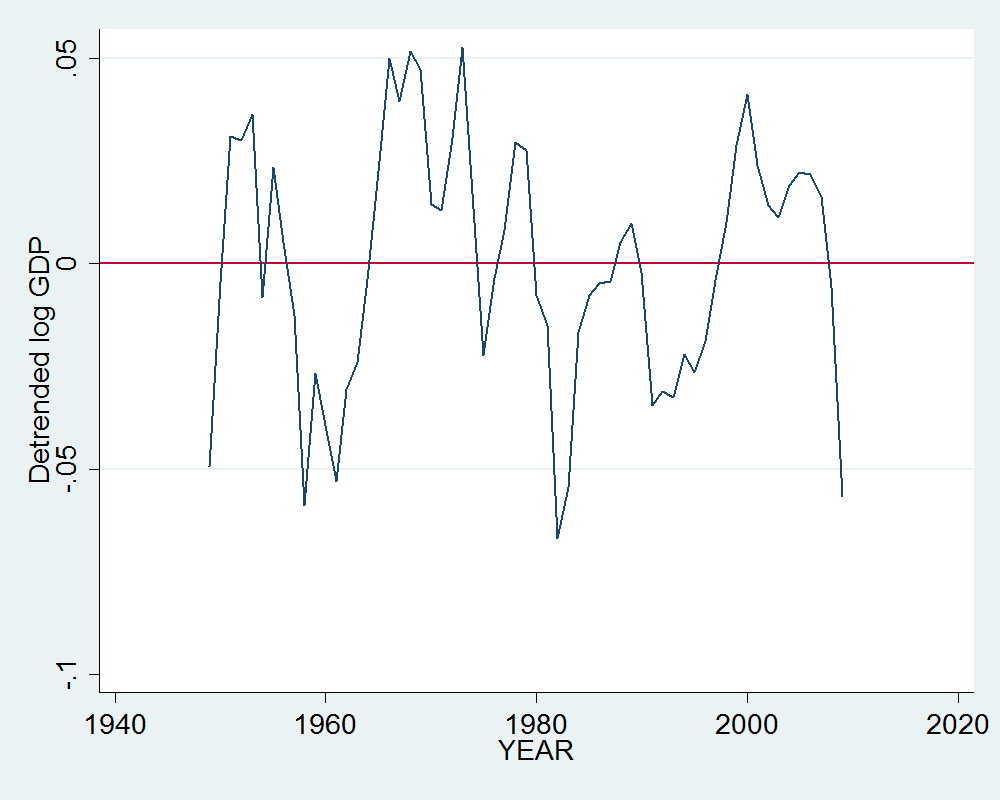

In [16]:
%%stata --graph
reg ly t tsq
predict uhat if e(sample), resid
label var uhat "Detrended log GDP"
line uhat YEAR, yline(0)

In [19]:
%%stata
********** Task 4 ************
* Determining the nonstationary properties of the data:
* Unit-root tests

* slide 166

* delta_0 = delta_1 = 0
reg D.uhat L.uhat, nocons


In [20]:
%%stata

dfuller uhat, nocons

In [21]:
%%stata

* delta_0 = delta_1 = 0
reg D.ly L.ly, nocons


In [22]:
%%stata

dfuller ly, nocons

In [ ]:
%%stata
* delta_0 <> 0 (constant), delta_1 = 0 (trend)
reg D.ly L.ly
dfuller ly

In [ ]:
%%stata
* slide 167

* delta_0, delta_1 <> 0
reg D.ly L.ly t
dfuller ly, trend

In [10]:
%%stata
********** Task 5 ************
* More unit-root tests

* p. 101

reg D.uhat L.uhat LD.uhat, nocons


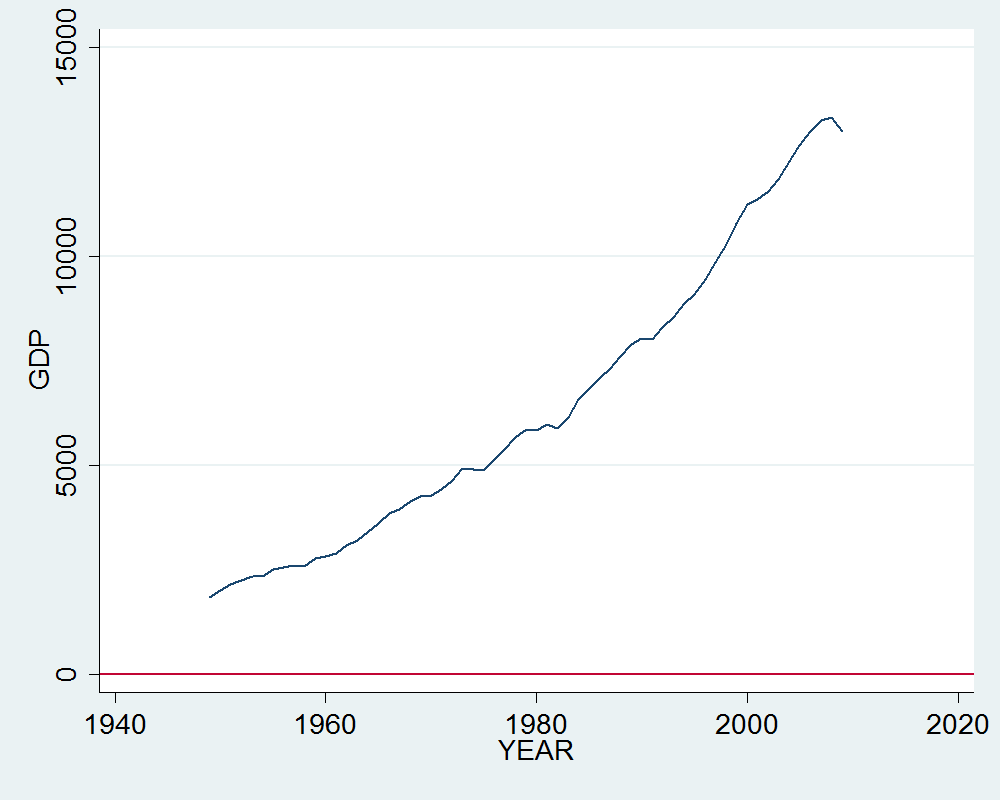

In [15]:
%%stata --graph
dfuller uhat, nocons lags(1)

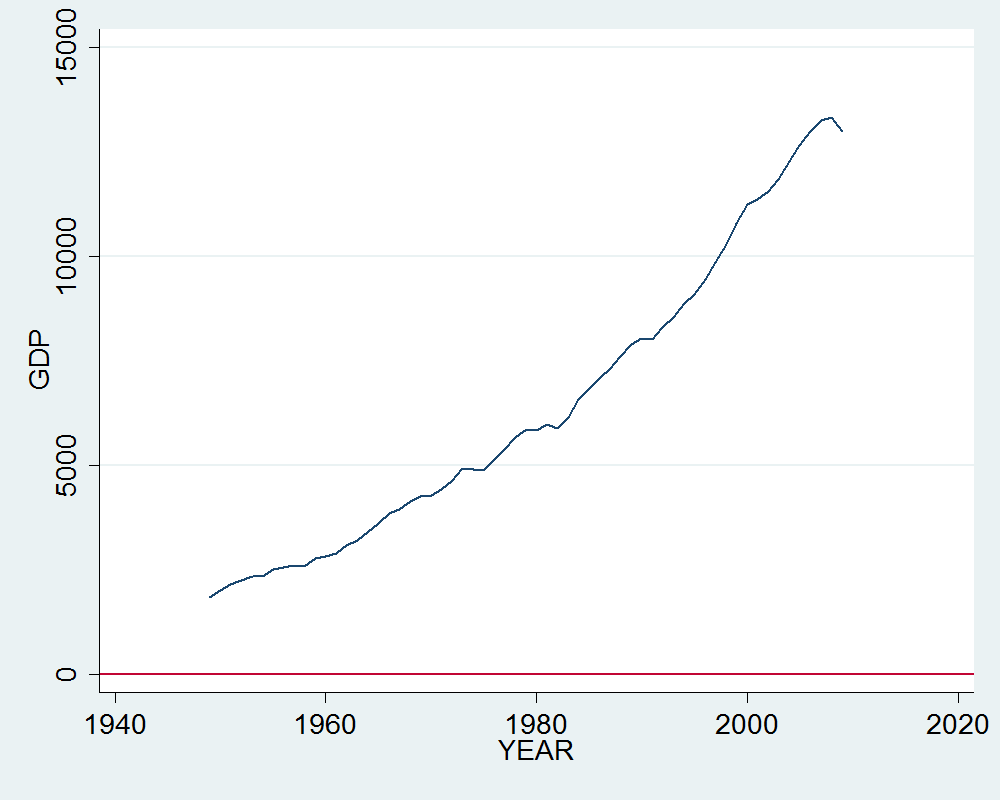

In [16]:
%%stata --graph
********** Task 6 ************
* Correlogram analysis

* p. 111

corrgram uhat



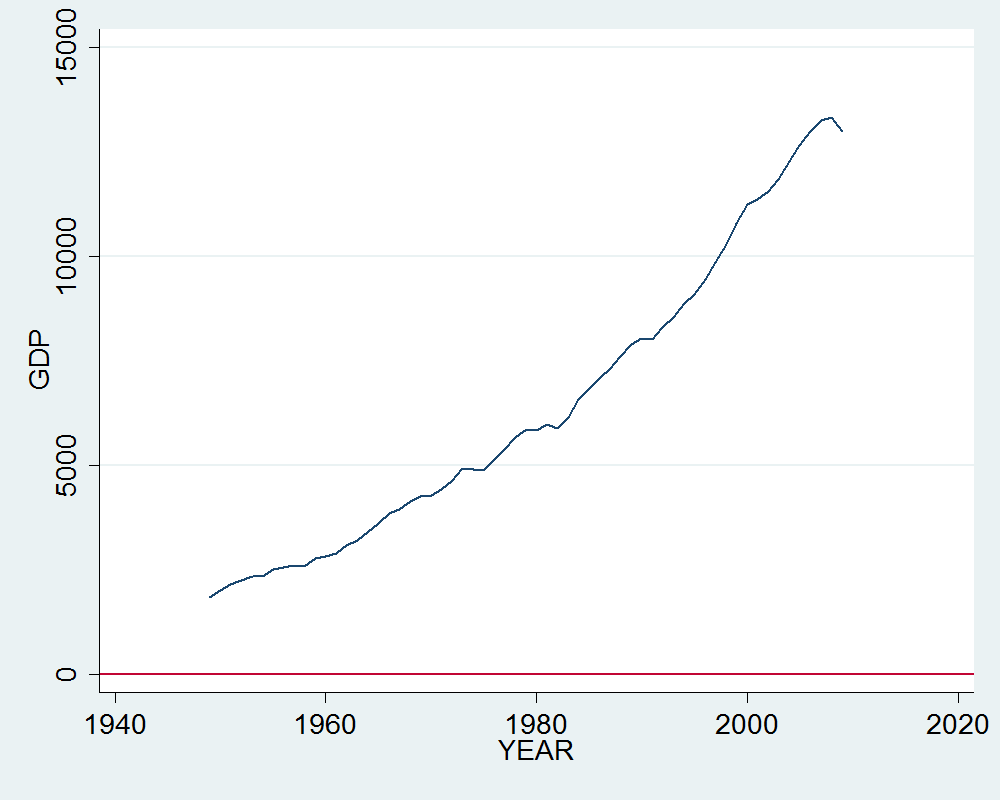

In [17]:
%%stata --graph
ac uhat

In [ ]:
%%stata
pac uhat

In [ ]:
%%stata
wntestq uhat, lags(1)


In [ ]:
%%stata
wntestq uhat, lags(2)

In [ ]:
%%stata

In [ ]:
%%stata

In [ ]:


























* Slide 177
reg uhat L.uhat L2.uhat, nocons
* Figure 11, slide 178
predict double fitted if e(sample), xb
predict double etahat if e(sample), resid
line uhat fitted YEAR
line etahat YEAR, yline(0)

var uhat, lags(1/2) nocons dfk small
varstable

* Slide 184
irf create ar2, set(myirf, replace)
irf graph irf
irf graph cirf

******** End of Lab *********

capture log close


In [12]:
%%stata
close all

use http://www.ssc.wisc.edu/~bhansen/390/gdp2013.dta

summary    
    

command close is unrecognized
r(199);

command summary is unrecognized
r(199);



In [9]:
%%stata --graph
*gen rate=d.t12

varsoc rate gdp, maxlag(8)


   Selection-order criteria
   Sample:  1955q3 - 2013q4                     Number of obs      =       234
  +---------------------------------------------------------------------------+
  |lag |    LL      LR      df    p      FPE       AIC      HQIC      SBIC    |
  |----+----------------------------------------------------------------------|
  |  0 | -908.041                      8.18559   7.77813   7.79004   7.80766  |
  |  1 | -882.051  51.979    4  0.000  6.78308   7.59018   7.62591*  7.67878* |
  |  2 | -876.011  12.081    4  0.017  6.66587*  7.57274*  7.63228    7.7204  |
  |  3 | -874.997  2.0279    4  0.731  6.83834   7.59826   7.68162   7.80499  |
  |  4 | -869.617   10.76*   4  0.029  6.75844   7.58647   7.69364   7.85226  |
  |  5 | -867.435  4.3637    4  0.359  6.86471   7.60201   7.73299   7.92687  |
  |  6 | -865.116  4.6376    4  0.327   6.9647   7.61638   7.77118    8.0003  |
  |  7 | -861.706  6.8213    4  0.146  7.00073   7.62142   7.80003   8.06441  |
  |  8 | -86

In [13]:
%%stata --graph
gen rate=d.t12
varbasic rate gdp, lags(1/3)

(25 missing values generated)

Vector autoregression

Sample:  1954q2 - 2013q4                        Number of obs     =        239
Log likelihood =  -892.5163                     AIC               =    7.58591
FPE            =   6.754369                     HQIC              =   7.667972
Det(Sigma_ml)  =   6.007455                     SBIC              =   7.789552

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
rate                  7     .753808   0.1348   37.22144   0.0000
gdp                   7     3.37814   0.1705   49.13799   0.0000
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
rate         |
        rate |
         L1. |  -.0716508   .0649398

In [14]:
%%stata --graph
irf create order1, step(10) set(myirf1)


file myirf1.irf could not be opened
r(603);

could not find Graph window
r(693);


No graph displayed, could not find one generated in this cell.


In [15]:
%%stata --graph
irf graph oirf, impulse(gdp) response(rate)

no irf file active
r(198);

could not find Graph window
r(693);


No graph displayed, could not find one generated in this cell.


In [16]:
%%stata --graph
use  http://www.stata-press.com/data/r13/lutkepohl2,clear
  
  
tsset
   
var  dln_inv  dln_inc  dln_consump  if  qtr<=tq(1978q4),  lutstats  dfk


varbasic  dln_inv  dln_inc  dln_consump  if  qtr<=tq(1978q4)



irf  graph  fevd,  lstep(1)
 
varlmar, mlag(5)
 

(Quarterly SA West German macro data, Bil DM, from Lutkepohl 1993 Table E.1)

        time variable:  qtr, 1960q1 to 1982q4
                delta:  1 quarter

Vector autoregression

Sample:  1960q4 - 1978q4                        Number of obs     =         73
Log likelihood =    606.307          (lutstats) AIC               =  -24.63163
FPE            =   2.18e-11                     HQIC              =  -24.40656
Det(Sigma_ml)  =   1.23e-11                     SBIC              =  -24.06686

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
dln_inv               7     .046148   0.1286   9.736909   0.1362
dln_inc               7     .011719   0.1142   8.508289   0.2032
dln_consump           7     .009445   0.2513   22.15096   0.0011
----------------------------------------------------------------

------------------------------------------------------------------------------
             |      Coef.   Std

In [ ]:
We can use stata in jupyter by load the ipystata package.

http://dev-ii-seminar.readthedocs.io/en/latest/notebooks/Stata_in_jupyter.html

 - The -o flag following the `%%Stata` magic instructs it to output or return the dataset in Stata memory as a pandas dataframe in python.

 - push the modified dataframe into the Stata dataset with the -d flag:
 
 ```stata
 %%stata -d life_df
 %%stata -d life_df --graph
 ```
 - %%stata -d life_df --graph for graph
 